In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [7]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## NAME 전처리

In [8]:
all_data['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [9]:
all_data["Occupation"] = all_data["Name"].str.split(",|\\.").str[1].str.strip()

# 직업 정보를 출력합니다.
print(all_data["Occupation"])

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Occupation, Length: 1309, dtype: object


In [10]:
all_data["Name"].str.split(",|\\.")

PassengerId
1                             [Braund,  Mr,  Owen Harris]
2       [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                              [Heikkinen,  Miss,  Laina]
4        [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                            [Allen,  Mr,  William Henry]
                              ...                        
1305                               [Spector,  Mr,  Woolf]
1306                     [Oliva y Ocana,  Dona,  Fermina]
1307                     [Saether,  Mr,  Simon Sivertsen]
1308                              [Ware,  Mr,  Frederick]
1309                         [Peter,  Master,  Michael J]
Name: Name, Length: 1309, dtype: object

In [11]:
a= all_data['Occupation'].unique()
a

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [12]:
occupation_counts = all_data["Occupation"].value_counts()

a = pd.concat([occupation_counts] , axis = 1)
a = a.reset_index()
a
# 계산된 결과를 데이터프레임으로 변환합니다.
# occupation_counts_df = occupation_counts.to_frame(name="Count")
#
# # 결과를 출력합니다.
# occupation_counts_df

,index,Occupation
0,Mr,757
1,Miss,260
2,Mrs,197
3,Master,61
4,Rev,8
5,Dr,8
6,Col,4
7,Ms,2
8,Major,2
9,Mlle,2


In [13]:
# t = a.values.tolist()
t = a["index"].to_numpy().tolist()[:6]
t

['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr']

In [14]:
for i in t:

    print(all_data[all_data["Name"].str.contains(i)])

             Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
4                 1.0       1   
5                 0.0       3   
6                 0.0       3   
...               ...     ...   
1299              NaN       1   
1303              NaN       1   
1305              NaN       3   
1307              NaN       3   
1308              NaN       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
...       

In [15]:
all_data['Name'] =all_data['Occupation']

In [16]:
all_data['Name'] = all_data['Name'].apply(lambda x: 'baby' if x not in t else x)
all_data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


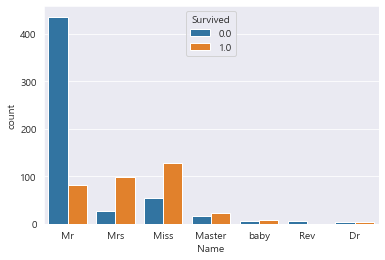

In [17]:
ax = sns.countplot(x='Name',  hue = 'Survived' , data = all_data)
plt.show()

## Cabin 전처리 해보기

In [18]:
all_data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F33                4
                  ..
C110               1
C104               1
B101               1
B73                1
E45                1
Name: Cabin, Length: 186, dtype: int64

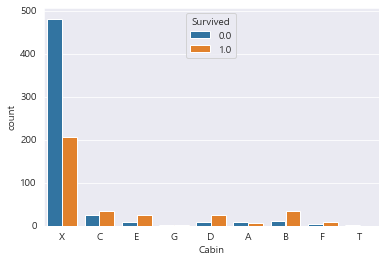

In [19]:
all_data['Cabin'] = all_data['Cabin'].fillna('X')

all_data['Cabin'] = all_data['Cabin'].apply(lambda x: x[0])

# all_data['Cabin'] = all_data['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Cabin',  hue = 'Survived' , data = all_data)
plt.show()

## Embarked 확인

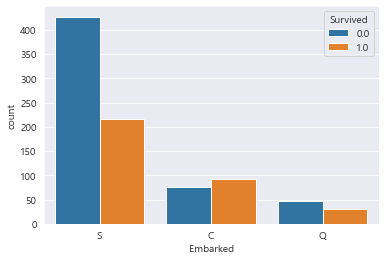

In [20]:
# all_data['Embarked'] = all_data['Cabin'].fillna('X')
#
# all_data['Cabin'] = all_data['Cabin'].apply(lambda x: x[0])

# all_data['Cabin'] = all_data['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Embarked',  hue = 'Survived' , data = all_data)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

# 명목형 변수 데이터
a= all_data['Cabin']
# LabelEncoder 인스턴스 생성
encoder = LabelEncoder()

# 데이터를 변환하여 숫자로 인코딩
encoded_labels = encoder.fit_transform(a)

all_data['Cabin'] = encoded_labels
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,8,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S,Mr


In [22]:
all_data[['Cabin' , 'Survived']]

,Cabin,Survived
PassengerId,,
1,8,0.0
2,2,1.0
3,8,1.0
4,2,1.0
5,8,0.0
...,...,...
1305,8,NaN
1306,2,NaN
1307,8,NaN


In [23]:
all_data[['Cabin' , 'Survived']].corr()

,Cabin,Survived
Cabin,1.000000,-0.301116
Survived,-0.301116,1.000000


In [24]:
all_data['Cabin'] = all_data['Cabin'].astype('int64')
all_data['Cabin'].dtype

dtype('int64')

In [25]:
all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S,Mr
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,Miss
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,3,Mr,male,35.0,0,0,373450,8.0500,8,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S,Mr
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S,Mr


## Fare , Embarked 전처리 하기

In [26]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
180,3,Mr,male,36.0,0,0,LINE,0.0,8,S,Mr
264,1,Mr,male,40.0,0,0,112059,0.0,1,S,Mr
272,3,Mr,male,25.0,0,0,LINE,0.0,8,S,Mr
278,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
303,3,Mr,male,19.0,0,0,LINE,0.0,8,S,Mr
414,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
467,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
482,2,Mr,male,NaN,0,0,239854,0.0,8,S,Mr
598,3,Mr,male,49.0,0,0,LINE,0.0,8,S,Mr


In [27]:
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode().iloc[0])

fare_medians = all_data[all_data['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data.iterrows():
    if row['Fare'] == 0 or row['Fare'] == 'NaN':
        all_data.at[i, 'Fare'] = fare_medians[row['Pclass']]
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].mode().iloc[0])
# 결과 확인
all_data.loc[816:824]
all_data.drop('Occupation', axis=1, inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S
5,3,Mr,male,35.0,0,0,373450,8.0500,8,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S


In [28]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [29]:
all_data.drop(all_data[['Ticket']] , axis = 1 , inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr,male,22.0,1,0,7.2500,8,S
2,1,Mrs,female,38.0,1,0,71.2833,2,C
3,3,Miss,female,26.0,0,0,7.9250,8,S
4,1,Mrs,female,35.0,1,0,53.1000,2,S
5,3,Mr,male,35.0,0,0,8.0500,8,S
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,8,S
1306,1,baby,female,39.0,0,0,108.9000,2,C
1307,3,Mr,male,38.5,0,0,7.2500,8,S


In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 134.6+ KB


In [31]:
binary_col = []
object_col = []

for i in all_data.columns.tolist():
    if all_data[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [32]:
all_data[object_col]

,Name,Sex,Embarked
PassengerId,,,
1,Mr,male,S
2,Mrs,female,C
3,Miss,female,S
4,Mrs,female,S
5,Mr,male,S
...,...,...,...
1305,Mr,male,S
1306,baby,female,C
1307,Mr,male,S


In [33]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.0,1,0,7.2500,8
2,1,38.0,1,0,71.2833,2
3,3,26.0,0,0,7.9250,8
4,1,35.0,1,0,53.1000,2
5,3,35.0,0,0,8.0500,8
...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,8
1306,1,39.0,0,0,108.9000,2
1307,3,38.5,0,0,7.2500,8


In [34]:
all_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
# le = LabelEncoder()
for i in range(len(object_col)):
    all_data = pd.get_dummies(all_data, columns=[object_col[i]])
    # all_data_label_encoded = encoder.fit_transform(all_data[object_col[i]])
#all_data[object_col[0]] = f_encoded
all_data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,26.0,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,35.0,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
1306,1,39.0,0,0,108.9000,2,0,0,0,0,0,0,1,1,0,1,0,0
1307,3,38.5,0,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1


In [36]:
all_data.iloc[:len(train)]

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,26.0,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,35.0,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,8,0,0,0,0,0,1,0,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,0,1,0,0,0,1
889,3,NaN,1,2,23.4500,8,0,0,1,0,0,0,0,1,0,0,0,1


In [37]:

num_train = len(train) # 훈련데이터 개수
print(num_train)

X_train = all_data[~pd.isnull(all_data['Age'])]
X_test = all_data[pd.isnull(all_data['Age'])]


X_train = X_train.drop(['Age'] , axis =1)
X_test = X_test.drop(['Age'] , axis =1)
train2 = all_data[~pd.isnull(all_data['Age'])]
y = train2['Age']
y

891


PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [38]:
all_data[pd.isnull(all_data['Age'])]

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
6,3,NaN,0,0,8.4583,8,0,0,0,1,0,0,0,0,1,0,1,0
18,2,NaN,0,0,13.0000,8,0,0,0,1,0,0,0,0,1,0,0,1
20,3,NaN,0,0,7.2250,8,0,0,0,0,1,0,0,1,0,1,0,0
27,3,NaN,0,0,7.2250,8,0,0,0,1,0,0,0,0,1,1,0,0
29,3,NaN,0,0,7.8792,8,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,NaN,0,0,7.7208,8,0,0,1,0,0,0,0,1,0,0,1,0
1302,3,NaN,0,0,7.7500,8,0,0,1,0,0,0,0,1,0,0,1,0
1305,3,NaN,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1


In [39]:
X_train

,Pclass,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
1,3,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,1,1,13.7750,8,0,0,1,0,0,0,0,1,0,0,0,1
1303,1,1,0,90.0000,2,0,0,0,0,1,0,0,1,0,0,1,0
1304,3,0,0,7.7750,8,0,0,1,0,0,0,0,1,0,0,0,1


In [40]:
y

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [41]:
X_train[X_train['Fare'].isnull()==True]

,Pclass,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,


In [42]:
#X_train[X_train['Embarked'].isnull()==True]

## AGE 에 대해 NaN 값 처리

In [43]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train , y) # 모델 훈련

LinearRegression()

In [44]:
preds = linear_reg_model.predict(X_test)

preds =preds.clip(0,100)
preds.tolist()
preds

array([34.564, 34.062, 29.688, 26.776, 23.421, 28.558, 42.274, 23.42 ,
       26.776, 26.781, 28.559, 33.226, 23.42 , 24.104, 41.33 , 37.871,
        2.351, 28.558, 28.559, 23.42 , 28.559, 28.559, 28.558, 28.557,
       22.161, 28.559, 34.558, 14.978, 29.357, 28.553, 28.564,  0.   ,
       43.668, 39.632,  1.42 ,  6.367, 32.303, 41.991, 36.139, 34.558,
       23.42 , 17.505, 33.161, 28.558, 13.178, 17.417, 14.302, 22.088,
       28.552, 41.217, 34.558, 23.42 , 39.675, 23.42 , 34.079, 41.789,
       37.871, 41.288, 23.42 , 31.895, 29.998, 28.559, 27.434, 17.505,
       20.757, 42.055, 28.558, 30.143, 41.326, 26.776, 23.421, 23.421,
       33.226, 29.688, 23.42 , 39.845, 28.558, 34.557, 13.178, 28.558,
       34.55 , 34.079, 31.471, 26.781, 28.552, 34.558, 30.143, 28.56 ,
       27.263, 28.559, 42.714, 34.558, 28.559, 34.079, 34.557, 28.552,
       42.008, 34.079, 13.178, 27.263, 26.837, 28.619, 23.419, 39.637,
       28.559, 34.696, 26.776, 26.776, 42.9  , 26.776, 29.417, 28.613,
      

In [45]:
all_data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,26.0,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,35.0,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
1306,1,39.0,0,0,108.9000,2,0,0,0,0,0,0,1,1,0,1,0,0
1307,3,38.5,0,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1


In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Age          1046 non-null   float64
 2   SibSp        1309 non-null   int64  
 3   Parch        1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Cabin        1309 non-null   int64  
 6   Name_Dr      1309 non-null   uint8  
 7   Name_Master  1309 non-null   uint8  
 8   Name_Miss    1309 non-null   uint8  
 9   Name_Mr      1309 non-null   uint8  
 10  Name_Mrs     1309 non-null   uint8  
 11  Name_Rev     1309 non-null   uint8  
 12  Name_baby    1309 non-null   uint8  
 13  Sex_female   1309 non-null   uint8  
 14  Sex_male     1309 non-null   uint8  
 15  Embarked_C   1309 non-null   uint8  
 16  Embarked_Q   1309 non-null   uint8  
 17  Embarked_S   1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(12)
memory usage:

In [47]:
nan_idx = all_data['Age'].isnull()
all_data.loc[nan_idx, 'Age'] = preds

In [48]:
all_data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,38.000000,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,26.000000,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,35.000000,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,35.000000,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,28.559126,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
1306,1,39.000000,0,0,108.9000,2,0,0,0,0,0,0,1,1,0,1,0,0
1307,3,38.500000,0,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1


## 위에꺼 까지가 연령에 대한 전처리 ==> 회귀 분석 사용

In [49]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   SibSp        1309 non-null   int64  
 3   Parch        1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Cabin        1309 non-null   int64  
 6   Name_Dr      1309 non-null   uint8  
 7   Name_Master  1309 non-null   uint8  
 8   Name_Miss    1309 non-null   uint8  
 9   Name_Mr      1309 non-null   uint8  
 10  Name_Mrs     1309 non-null   uint8  
 11  Name_Rev     1309 non-null   uint8  
 12  Name_baby    1309 non-null   uint8  
 13  Sex_female   1309 non-null   uint8  
 14  Sex_male     1309 non-null   uint8  
 15  Embarked_C   1309 non-null   uint8  
 16  Embarked_Q   1309 non-null   uint8  
 17  Embarked_S   1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(12)
memory usage:

In [50]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,8
2,1,38.000000,1,0,71.2833,2
3,3,26.000000,0,0,7.9250,8
4,1,35.000000,1,0,53.1000,2
5,3,35.000000,0,0,8.0500,8
...,...,...,...,...,...,...
1305,3,28.559126,0,0,8.0500,8
1306,1,39.000000,0,0,108.9000,2
1307,3,38.500000,0,0,7.2500,8


In [51]:
all_data[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1309 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1309 non-null   float64
 5   Cabin   1309 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 103.9 KB


In [52]:
all_data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1
2,1,38.000000,1,0,71.2833,2,0,0,0,0,1,0,0,1,0,1,0,0
3,3,26.000000,0,0,7.9250,8,0,0,1,0,0,0,0,1,0,0,0,1
4,1,35.000000,1,0,53.1000,2,0,0,0,0,1,0,0,1,0,0,0,1
5,3,35.000000,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,28.559126,0,0,8.0500,8,0,0,0,1,0,0,0,0,1,0,0,1
1306,1,39.000000,0,0,108.9000,2,0,0,0,0,0,0,1,1,0,1,0,0
1307,3,38.500000,0,0,7.2500,8,0,0,0,1,0,0,0,0,1,0,0,1


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x571 sparse matrix of type '<class 'numpy.float64'>'
	with 23562 stored elements in Compressed Sparse Row format>

## 성능 개선 -> 피처 엔지니어링

In [54]:
object_col

['Name', 'Sex', 'Embarked']

In [55]:

all_data_obj = all_data[object_col]

all_data_obj[object_col].info()
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

KeyError: "None of [Index(['Name', 'Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

In [ ]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



# plt.figure(figsize=(7,6))
# train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# ax = sns.countplot(x='Survival' , data = train_bin)
# write_percent(ax , len(train)) # 비율 표시
# ax.set_title('타이타닉 호 생존자')

In [ ]:
binary_col

## 연속형 피처 분포

In [ ]:
all_data_bin = all_data[binary_col]

all_data_bin

## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

In [ ]:
K = 60 # 계급간격
AGG = 10 # Age 간격

In [ ]:
width = (max(all_data_bin['Fare']) - min(all_data_bin['Fare'])) / K #계급 간격 구하는 공식
bins = np.arange(min(all_data_bin['Fare']), max(all_data_bin['Fare']), width)


hist, bins = np.histogram(all_data_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('Fare 양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])
min_log_fare = min(all_data_bin['log_Fare'])
min_log_fare_row = all_data_bin[all_data_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




In [ ]:
width = (max(all_data_bin['log_Fare']) - min(all_data_bin['log_Fare'])) / K #계급 간격 구하는 공식
print(f'width : {width}')
print(max(all_data_bin['log_Fare']))
print(min(all_data_bin['log_Fare']))
bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = all_data_bin['log_Fare'].min()
max_val = all_data_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)
# train 데이터프레임 내용 확인
all_data_bin


In [ ]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered=False)
# train 데이터프레임 내용 확인
all_data_bin

In [ ]:
print(all_data_bin['Fare_binned'].unique())

print(all_data_bin['Fare_binned_범위'].unique())

In [ ]:
from matplotlib import gridspec

mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
all_data_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin))



In [ ]:
bins_exp = np.exp(bins)
bins_exp

### 'AGE' 계급간격 구하기

In [ ]:
all_data_bin['Age'].describe()

In [ ]:
bins = np.arange(min(all_data_bin['Age']), max(all_data_bin['Age']), width)


hist, bins = np.histogram(all_data_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

In [ ]:
width = (max(all_data_bin['Age']) - min(all_data_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(all_data_bin['Age']))
print(min(all_data_bin['Age']))
bins = np.arange(0,90,AGG)
hist, bins = np.histogram(all_data_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
labels = [f"{bins[i]}대" for i in range(len(bins)-1)]

all_data_bin['Age_binned'] = pd.cut(all_data_bin['Age'], bins=len(labels), labels=labels , ordered = False)
all_data_bin

In [ ]:
all_data_bin.columns.tolist()

In [ ]:
all_data_bin2 = all_data_bin[['Age','Age_binned','Pclass' ,'SibSp','Parch' ,'Survival' , 'Cabin','Fare' ,'Fare_binned' ]]
all_data_bin2

## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [ ]:
all_data_obj

## ==> MR. MRS. MISS . baby 등 필요할듯

In [ ]:
all_data_obj2 =  pd.merge(all_data_obj, all_data_bin2['Survival'] , how='outer' , on=('PassengerId'))
all_data_obj2

In [ ]:
all_data2 = pd.merge(all_data_obj , all_data_bin2, how='outer' , on=('PassengerId'))

all_data2 = all_data2[['Survival','Name','Sex' , 'Embarked' ,'Age_binned', 'Pclass' ,'SibSp' , 'Parch' , 'Cabin' , 'Fare_binned']]
columns_1 = all_data2.columns.tolist()
all_data2

In [ ]:
print(all_data2['Sex'].unique())

In [ ]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
nom_feature = ['Name','Age_binned','Sex' , 'Embarked', 'Cabin' , 'Fare_binned']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data2[nom_feature])
print(type(encoded_nom_matrix))
encoded_nom_matrix

In [ ]:
# 범주형 변수의 원래 이름을 추출합니다.
#
nom_feature_names = []
for feature in nom_feature:
    categories = onehot_encoder.categories_[nom_feature.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")



# 결과를 출력합니다.
print(nom_feature_names)


In [ ]:
print(type(encoded_nom_matrix))

In [ ]:
all_data2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
ax = sns.countplot(x='Fare_binned', hue='Survival', data=all_data2)

# x 축 값이 잘 보이도록 설정
ax.tick_params(axis='x', labelrotation=45)

# 그래프 출력
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 히스토그램 그리기
sns.histplot(all_data2['Fare_binned'].dropna(), kde=True, stat='density', color='skyblue', alpha=0.7)

# 정규분포 계산
mu, std = norm.fit(all_data2['Fare_binned'].dropna())

# x 값 범위 설정
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포 그래프 그리기
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# 그래프 제목 설정
plt.title(f'Fare 범위(log화) (mu={mu:.2f}, std={std:.2f})')

# 그래프 출력
plt.show()


In [ ]:
# all_data2 = all_data2.drop(nom_feature , axis =1)
all_data2

In [ ]:
# all_data2['log_Fare'] = np.log(all_data['Fare'])
# all_data2

# 인코딩 및 스케일링 된 피처 합치기

In [ ]:
# from sklearn.preprocessing import StandardScaler
#
# standard_scaler = StandardScaler()
#
# encoded_stan = standard_scaler.fit_transform(all_data2[['Name','Age' ]])
#
# encoded_stan

In [ ]:
# import seaborn as sns
# from scipy.stats import norm
# import matplotlib.pyplot as plt
#
# # 히스토그램과 정규분포 곡선 그리기
# sns.histplot(all_data2['Fare_binned'], kde=True, stat='density', color='skyblue', alpha=0.7)
# mu, std = norm.fit(all_data2['Fare_binned'].dropna())
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 10)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'r', linewidth=2)
# plt.title(f'Fare_binned (mu={mu:.2f}, std={std:.2f})')
# plt.show()

In [ ]:
nom_feature_names

In [ ]:
all_data2 = all_data2[['SibSp' ,'Pclass', 'Parch']]
all_data2

In [ ]:
encoded_nom_matrix

In [ ]:
# encoded_stan

In [ ]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix],
                              format='csr')

all_data_sprs

In [ ]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names
CSR_NAMES

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values

In [ ]:
print(X_train.toarray())

In [ ]:
X_train

## 하이퍼파라미터 최적화

In [ ]:
import numpy as np


def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]  # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples)  # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()]  # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)  # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred)  # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()]  # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)  # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)  # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true


# LightGBM 용 gini() 함수

def gini(preds, dtrain):
    labels = dtrain.get_label()

    return 'gini', eval_gini(labels, preds), True


In [ ]:
# OOF 방식으로 LightGBM 훈련
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# 층화 K 폴드 교차 검증기는 타깃값이 불균형하므로 K폴드가 아닌 층화 K폴드를 수행하는 게 바람직하다. 층화 K폴드는 타깃값이 균등하게
# 폴드를 나누는 방식이기 때문이다.


# n_splits 파라미터로 전달한 수만큼 폴드를 나눈다. 여기서는 5개로 나누었다. shuffle = True 를 전달하면 폴드를 나눌때 데이터를 섞어준다.
# LightGBM의 하이퍼파라미터를 설정한다. LightGBM은 하이퍼파라미터를 갖고 있지만, 여기서는 4가지만 설정한다.

params = {'objective': 'binary', 'learning_rate': 0.01, 'force_row_wise': True, 'random_state': 0}

# 이진분류 문제이므로 objective 파라미터는 binary로 설정했다. 학습률은 0.01로, 랜덤 스테이트 값은 9으로 설정했다.
# force_row_wise : True 는 경고 문구를 없애려고 추가한 파라미터이다.
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X_train.shape[0])

# ==> oof_val_preds 는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K 폴드로 나누어도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds 배열 크기는 훈련 데이터와 같아야 한다.
# 훈련 데이터 개수는 X.shpae[0]으로 구한다.

# OOF 방식으로 훈련된 모델로 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야한다. 테스트 데이터 개수는 X_test.shape[0]으로 구한다.


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X_train, y)):
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    X_train2, y_train = X_train[train_idx], y[train_idx]  # 훈련용 데이터
    X_valid, y_valid = X_train[valid_idx], y[valid_idx]  # 검증용 데이터

    dtrain = lgb.Dataset(X_train2, y_train)  # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid, y_valid)  # LightGBM 전용 검증 데이터 셋

    lgb_model = lgb.train(params=params,  # 훈련용 하이퍼파라미터
                          train_set=dtrain,  # 훈련 데이터 셋
                          num_boost_round=1000,  # 부스팅 반복 횟수
                          valid_sets=dvalid,  # 성능 평가용 검증 데이터 셋
                          early_stopping_rounds=100,  # 조기종료 조건
                          verbose_eval=100)  # 100번째마다 점수 출력

    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 이진 분류에 맞게 변환
    oof_val_preds[valid_idx] += (lgb_model.predict(X_valid) >= 0.5).astype(int)

    # 적절한 평가지표 선택
    accuracy = accuracy_score(y_valid, oof_val_preds[valid_idx])
    precision = precision_score(y_valid, oof_val_preds[valid_idx])
    recall = recall_score(y_valid, oof_val_preds[valid_idx])
    f1 = f1_score(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 점수: {f1}\n')


In [ ]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ",date_list)



In [ ]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 모델 하이퍼파라미터 최적화

In [ ]:
all_data_sprs

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y= train['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)


# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위

# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves' : (30 , 40) , # 개별 트리가 가질 수 있는 최대 말단 노드 개수 , 트리 복잡도 결정, 값이 클수록 좋다.
                'lambda_l1' : (0.7 , 0.9), # L1 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'lambda_l2' : (0.9 , 1), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'feature_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
                'bagging_fraction' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                'min_child_samples' : (6 , 10) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수 , 값이 클수록 과대적합 방지
                'min_child_weight' : (10 , 40)} # 과대적합 방지 위한 값


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary' , # 훈련 목적 , 회귀에서는 'regression' , 이진분류에서는 'binary' , 다중분류에서는 'multiclass' 사용
                'learning_rate' : 0.005, # 학습률( 부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용 되는 비율)
                'bagging_freq' : 1, # 배깅 수행 빈도, 몇번의 이터레이션마다 배깅 수행할 지 결정
                'force_row_wise' : True, # 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
                'random_state' : 1991} # 랜덤 시드값 (코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def eval_function(num_leaves , lambda_l1 , lambda_l2 , feature_fraction , bagging_fraction , min_child_samples , min_child_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'num_leaves' : int(round(num_leaves)) , # 개발 트리가 가질 수 있는 최대 말단 노드 개수, 트리 복잡도 결정 , 값이 클수록 좋다.
              'lambda_l1' : lambda_l1, # L1 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'lambda_l2' : lambda_l2 , # L2 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'feature_fraction' : feature_fraction ,  # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
              'bagging_fraction' : bagging_fraction, # 개별 트리를 훈련할 때 사용할 배깅 데이터 샘플링 비율
              'min_child_samples' : int(round(min_child_samples)) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수, 값이 클수록 과대적합 방지
              'min_child_weight' : min_child_weight, # 과대적합 방지 위한 값
              'feature_pre_filter' : False} #

    #하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
                          train_set = bayes_dtrain, # 훈련 데이터셋
                          num_boost_round= 2500, #부스팅 반복횟수
                          valid_sets= bayes_dvalid, # 성능 평가용 검증 데이터 셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval= False) # 계속 점수 출력
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function, # 평가지표 계산 함수
                                 pbounds = param_bounds, # 하이퍼파라미터 범위
                                 random_state = 0 )

In [ ]:
# 베이지안 최적화 수행

optimizer.maximize(init_points=  3 , n_iter = 6) # init_points 는 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter는 베이지안 최적화 반복 횟수

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params


In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
# 최종 하이퍼파라미터 출력
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5 , shuffle = True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열

oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련 ,검증 , 예측

for idx, (train , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)

    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round= 2500, # 부스팅 반복 횟수
                          valid_sets= dvalid , # 성능 평가용 검증 데이터셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval = 100) # 100 번째 마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    oof_test_preds_lgb = oof_test_preds
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_lgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## XGBoost 모델

In [ ]:
# XGBoost용 gini() 함수

def gini(preds , dtrain):
    labels = dtrain.get_label()
    return 'gini' , eval_gini(labels,preds)

### 데이터 셋 준비


In [ ]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터 , 검증 데이터 분리( 베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 8) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.7 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 7), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6)} # 뷸균형 데이터 가중치 조정 값 ,
# 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
# 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary:logistic' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용
                'learning_rate' : 0.02, # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)
                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def eval_function(max_depth , subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = gini, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

## 최적화 수행

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
max_params

## 모델 훈련 및 성능 검증


In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = gini,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 : ' , eval_gini(y , oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = xgb_model.predict(dvalid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_xgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
oof_test_preds_xgb

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_xgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 과 XGBoost 앙상블

In [ ]:
oof_test_preds = oof_test_preds_lgb *0.5 + oof_test_preds_xgb *0.5

oof_test_preds

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
lgb_valid_probabilities = lgb_model.predict(X_valid)
xgb_valid_probabilities = xgb_model.predict(dvalid)

# 앙상블된 예측 확률 계산
ensemble_valid_probabilities = (lgb_valid_probabilities + xgb_valid_probabilities) / 2

# Case 1: ensemble_valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = ensemble_valid_probabilities

# Case 2: ensemble_valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = ensemble_valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = ( oof_test_preds >= optimal_threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds




In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')